In [ ]:
# DRIVER DROWSINESS DETECTION

In [ ]:
import numpy as np
import pandas as pd
from glob import glob
import os
import PIL
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
data_path = r"C:\Users\user\Downloads\drowsiness 1\eyes open closed"
all_faces = glob(r"C:\Users\user\Downloads\drowsiness 1\eyes open closed/*/*")
print(len(all_faces))

1452


In [ ]:
batch_size = 64
num_classes = 2
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_path,
                                                               validation_split=0.25,
                                                               subset="training",
                                                               seed=123,
                                                               label_mode = 'int',
                                                               image_size=(img_height, img_width),
                                                               batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_path,
                                                               validation_split=0.25,
                                                               subset="validation",
                                                               seed=123,
                                                               label_mode = 'int',
                                                               image_size=(img_height, img_width),
                                                               batch_size=batch_size)

Found 1452 files belonging to 2 classes.
Using 1089 files for training.
Found 1452 files belonging to 2 classes.
Using 363 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Closed', 'Open']


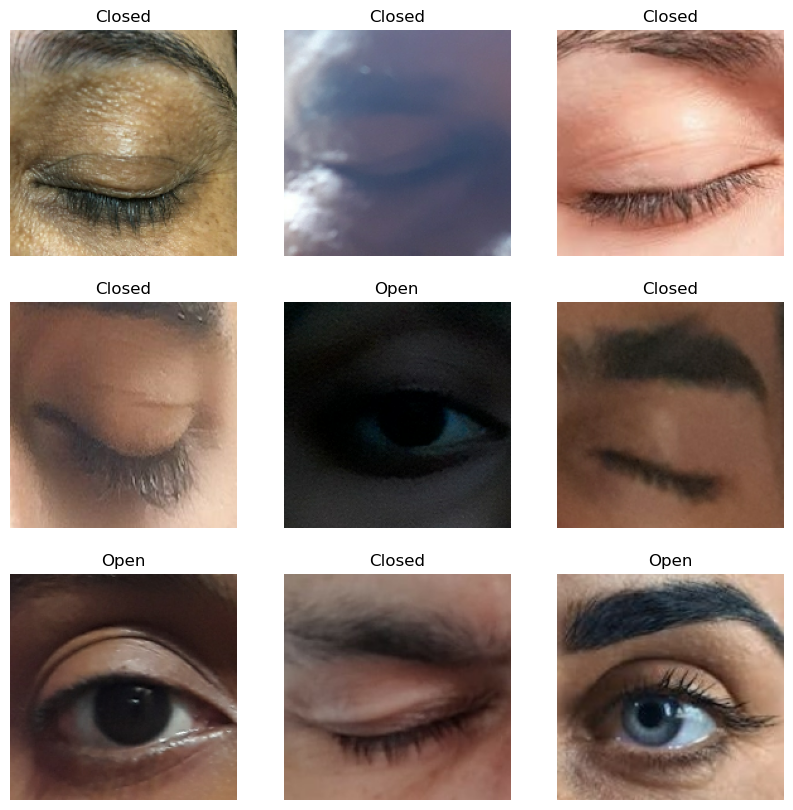

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        ax.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off");

## First CNN

In [ ]:
model = Sequential([
                  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),
                  layers.Conv2D(16, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Conv2D(32, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Conv2D(64, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Dropout(0.2),
                  layers.Flatten(),
                  layers.Dense(128, activation='relu'),
                  layers.Dense(num_classes, activation = 'sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=3,
                                                  mode='min',
                                                  restore_best_weights=True
                                                 )

filepath = 'model_1.h5'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath,
                                                      monitor="val_loss",
                                                      save_best_only=True,
                                                      save_weights_only=False,
                                                      mode="min",
                                                      save_freq="epoch",
                                                    )

In [ ]:
epochs = 15
history = model.fit(train_ds, validation_data = val_ds, epochs = epochs,
                    verbose = 1, callbacks=[early_stopping, model_checkpoint])

Epoch 1/15


18/18 [==============================] - 67s 3s/step - loss: 0.7697 - accuracy: 0.6235 - val_loss: 0.5348 - val_accuracy: 0.8375


C:\Users\user\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/15
18/18 [==============================] - 57s 3s/step - loss: 0.3915 - accuracy: 0.8283 - val_loss: 0.2808 - val_accuracy: 0.8815
Epoch 3/15
18/18 [==============================] - 56s 3s/step - loss: 0.2062 - accuracy: 0.9229 - val_loss: 0.7351 - val_accuracy: 0.8044
Epoch 4/15
18/18 [==============================] - 55s 3s/step - loss: 0.1548 - accuracy: 0.9458 - val_loss: 0.1343 - val_accuracy: 0.9587
Epoch 5/15
18/18 [==============================] - 55s 3s/step - loss: 0.1194 - accuracy: 0.9541 - val_loss: 0.1291 - val_accuracy: 0.9477
Epoch 6/15
18/18 [==============================] - 56s 3s/step - loss: 0.0840 - accuracy: 0.9688 - val_loss: 0.1597 - val_accuracy: 0.9394
Epoch 7/15
18/18 [==============================] - 56s 3s/step - loss: 0.0641 - accuracy: 0.9770 - val_loss: 0.0840 - val_accuracy: 0.9642
Epoch 8/15
18/18 [==============================] - 54s 3s/step - loss: 0.1079 - accuracy: 0.9578 - val_loss: 0.1602 - val_accuracy: 0.9477
Epoch 9/15
18/18 [==

In [ ]:
model1_acc = model.evaluate(val_ds)[1]
model1_acc

6/6 [==============================] - 5s 735ms/step - loss: 0.0840 - accuracy: 0.9642


0.9641873240470886

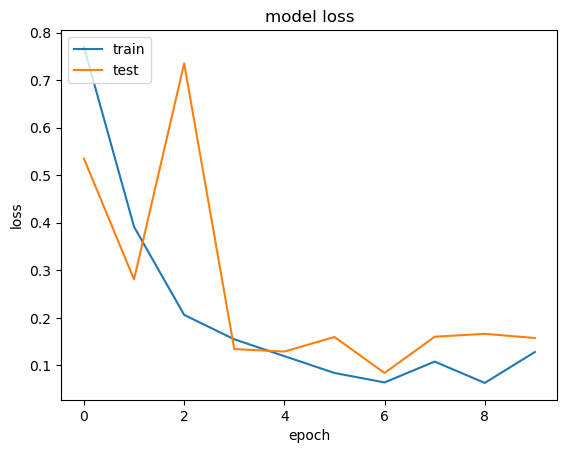

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')

plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

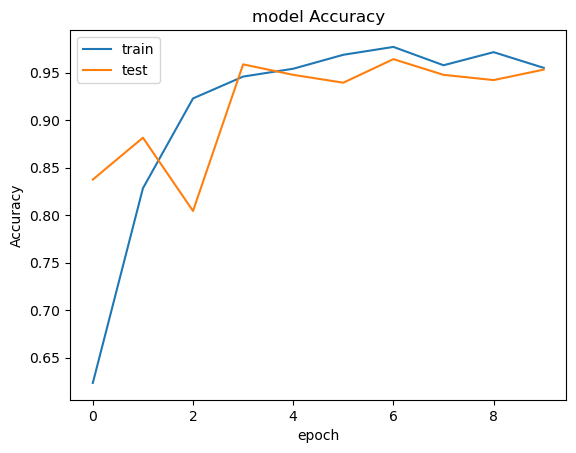

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')

plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Second CNN

In [ ]:
model = Sequential([
                  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),
                  layers.Conv2D(32, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Conv2D(64, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Conv2D(128, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Conv2D(256, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Dropout(0.2),
                  layers.Flatten(),
                  layers.Dense(128, activation='relu'),
                  layers.Dense(num_classes, activation = 'sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=3,
                                                  mode='min',
                                                  restore_best_weights=True
                                                 )

filepath = 'model_2.h5'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath,
                                                      monitor="val_loss",
                                                      save_best_only=True,
                                                      save_weights_only=False,
                                                      mode="min",
                                                      save_freq="epoch",
                                                    )

In [ ]:
epochs = 15
history = model.fit(train_ds, validation_data = val_ds, epochs = epochs,
                    verbose = 1, callbacks=[early_stopping, model_checkpoint])

Epoch 1/15
18/18 [==============================] - 201s 11s/step - loss: 0.5844 - accuracy: 0.7034 - val_loss: 0.2601 - val_accuracy: 0.8926
Epoch 2/15
18/18 [==============================] - 196s 11s/step - loss: 0.2246 - accuracy: 0.9256 - val_loss: 0.2285 - val_accuracy: 0.9339
Epoch 3/15
18/18 [==============================] - 197s 11s/step - loss: 0.1727 - accuracy: 0.9385 - val_loss: 0.1357 - val_accuracy: 0.9477
Epoch 4/15
18/18 [==============================] - 196s 11s/step - loss: 0.1217 - accuracy: 0.9568 - val_loss: 0.1068 - val_accuracy: 0.9449
Epoch 5/15
18/18 [==============================] - 200s 11s/step - loss: 0.1055 - accuracy: 0.9578 - val_loss: 0.1732 - val_accuracy: 0.9532
Epoch 6/15
18/18 [==============================] - 198s 11s/step - loss: 0.1002 - accuracy: 0.9660 - val_loss: 0.0600 - val_accuracy: 0.9862
Epoch 7/15
18/18 [==============================] - 196s 11s/step - loss: 0.0638 - accuracy: 0.9761 - val_loss: 0.0687 - val_accuracy: 0.9835
Epoch 

In [ ]:
model2_acc = model.evaluate(val_ds)[1]
model2_acc

6/6 [==============================] - 24s 4s/step - loss: 0.0600 - accuracy: 0.9862


0.9862259030342102

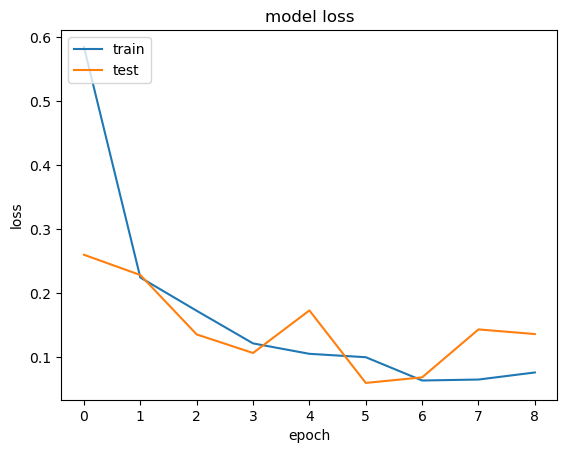

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')

plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

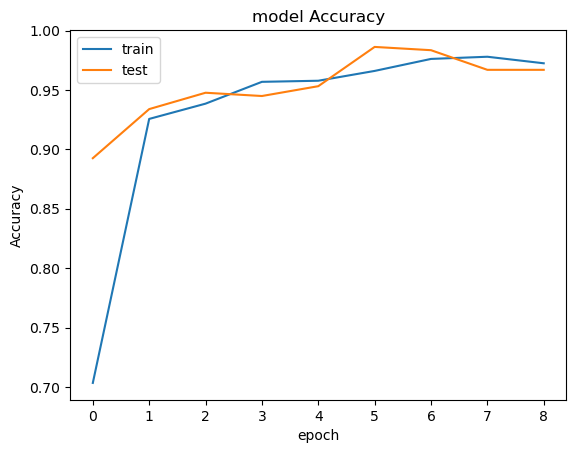

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')

plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Third CNN

In [ ]:
model = Sequential([
                  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),
                  layers.Conv2D(32, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Conv2D(64, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Conv2D(128, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Dropout(0.2),
                  layers.Conv2D(256, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Dropout(0.2),
                  layers.Conv2D(512, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Dropout(0.2),
                  layers.Flatten(),
                  layers.Dense(256, activation='relu'),
                  layers.Dropout(0.2),
                  layers.Dense(128, activation = 'relu'),
                  layers.Dense(num_classes, activation = 'sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=3,
                                                  mode='min',
                                                  restore_best_weights=True
                                                 )

filepath = 'model_3.h5'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath,
                                                      monitor="val_loss",
                                                      save_best_only=True,
                                                      save_weights_only=False,
                                                      mode="min",
                                                      save_freq="epoch",
                                                    )

In [ ]:
epochs = 15
history = model.fit(train_ds, validation_data = val_ds, epochs = epochs,
                    verbose = 1, callbacks=[early_stopping, model_checkpoint])

Epoch 1/15
18/18 [==============================] - 264s 14s/step - loss: 0.7472 - accuracy: 0.5069 - val_loss: 0.6824 - val_accuracy: 0.5124
Epoch 2/15
18/18 [==============================] - 249s 14s/step - loss: 0.5860 - accuracy: 0.6575 - val_loss: 0.8779 - val_accuracy: 0.7741
Epoch 3/15
18/18 [==============================] - 247s 14s/step - loss: 0.3777 - accuracy: 0.8595 - val_loss: 0.3261 - val_accuracy: 0.8788
Epoch 4/15
18/18 [==============================] - 245s 14s/step - loss: 0.2471 - accuracy: 0.9174 - val_loss: 0.1970 - val_accuracy: 0.9366
Epoch 5/15
18/18 [==============================] - 245s 14s/step - loss: 0.2063 - accuracy: 0.9238 - val_loss: 0.2678 - val_accuracy: 0.9477
Epoch 6/15
18/18 [==============================] - 245s 14s/step - loss: 0.2828 - accuracy: 0.9082 - val_loss: 0.2250 - val_accuracy: 0.9421
Epoch 7/15
18/18 [==============================] - 245s 14s/step - loss: 0.1822 - accuracy: 0.9449 - val_loss: 0.1183 - val_accuracy: 0.9559
Epoch 

In [ ]:
model3_acc = model.evaluate(val_ds)[1]
model3_acc

6/6 [==============================] - 30s 5s/step - loss: 0.0535 - accuracy: 0.9862


0.9862259030342102

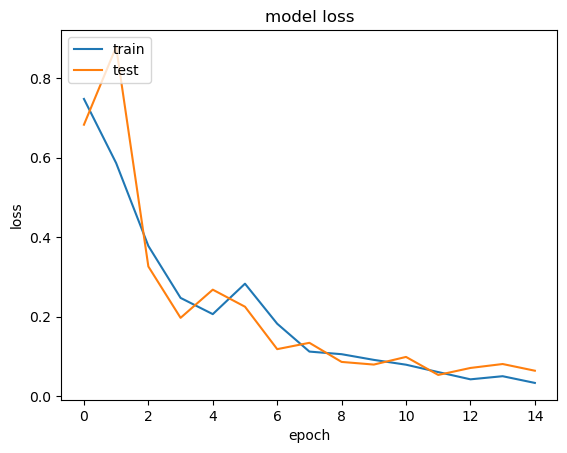

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')

plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

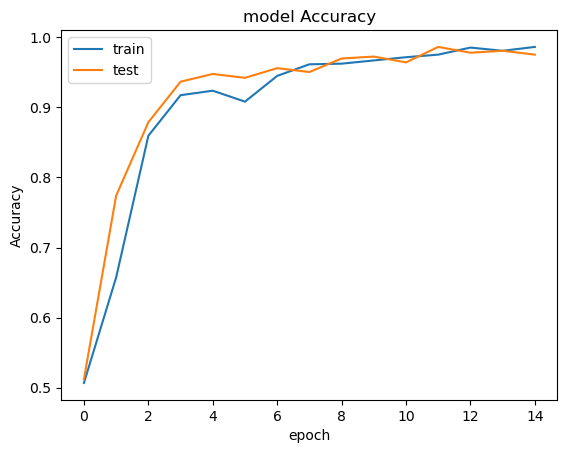

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')

plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Comparing Results

In [ ]:
results = {'First_CNN' : model1_acc, 'Second_CNN' : model2_acc, 'Third_CNN' : model3_acc}
results

{'First_CNN': 0.9641873240470886,
 'Second_CNN': 0.9862259030342102,
 'Third_CNN': 0.9862259030342102}

(0.95, 1.0)

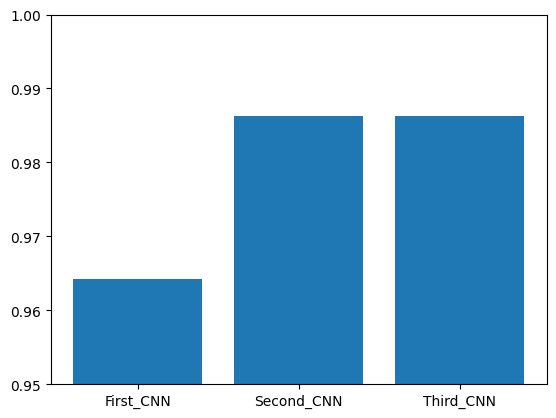

In [ ]:
plt.bar(results.keys(), results.values())
plt.ylim(0.95, 1.00)